# Libraries Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# Data Loading

In [103]:
train = pd.read_csv("train_s3TEQDk.csv")
test = pd.read_csv("test_mSzZ8RL.csv")
ID = pd.read_csv("sample_submission_eyYijxG.csv")

In [3]:
ID

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,0
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0
...,...,...
105307,DBENJOYI,0
105308,CWQ72DWS,0
105309,HDESC8GU,0
105310,2PW4SFCA,0


In [4]:
ID.drop(columns="Is_Lead",inplace=True)

In [5]:
train.shape,test.shape,ID.shape

((245725, 11), (105312, 10), (105312, 1))

In [6]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# Checking For NAN Values

In [7]:
train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [8]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [9]:
train.drop(columns="ID",inplace=True)
test.drop(columns="ID",inplace=True)

# NAN Values filling

### I created a copy of data set to experiment the NAN value that can best suit our case

In [284]:
temp_train = train.copy()
temp_test = test.copy()

In [285]:
temp_train.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [286]:
temp_train.drop(columns="Is_Lead",inplace=True)

In [287]:
pd.isna(temp_train["Credit_Product"].iloc[245720])

True

In [288]:
temp_train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No
...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes
245722,Female,26,RG281,Salaried,X1,13,No,670659,No
245723,Female,28,RG273,Salaried,X1,31,No,407504,No


### Storing the index of the features which have NAN values both in train & test

In [290]:
index = []
for i in range(len(temp_train)):
    if pd.isna(temp_train["Credit_Product"].iloc[i]) == True:
        index.append(i)

In [ ]:
index_test = []
for i in range(len(temp_test)):
    if pd.isna(temp_test["Credit_Product"].iloc[i]) == True:
        index_test.append(i)

# Finding the rows which have NAN values present in it and creating 2 different data sets one having all NAN value and one which do not have any NAN values

In [244]:
new_train = []
new_test = []
for i in range(len(temp_train)):
    if pd.isna(temp_train["Credit_Product"].iloc[i]) == False:
        new_train.append(temp_train.iloc[i])
    else:
        new_test.append(temp_train.iloc[i])

In [245]:
temp_train.shape,temp_test.shape

((245725, 9), (105312, 9))

In [246]:
for i in range(len(temp_test)):
    if pd.isna(temp_test["Credit_Product"].iloc[i]) == False:
        new_train.append(temp_test.iloc[i])
    else:
        new_test.append(temp_test.iloc[i])

# The data set is ready

In [247]:
Nan_train = pd.DataFrame(new_train,columns=temp_train.columns)
Nan_test = pd.DataFrame(new_test,columns=temp_test.columns)

In [248]:
Nan_train.reset_index(drop=True,inplace=True)
Nan_test.reset_index(drop=True,inplace=True)

### Now here comes the main Aim we will try to train a model in which we will take "Credit_Product" feature as an dependent variable and remove the original dependent feature that is "Is_Lead" from our current data set we will combine all the rows from train and test which do not have any NAN values and assume it as our train data which have dependent variable as "Credit_Product" at the same time will will merge all the rows from train and test which have NAN values and assume it as our test data now we will train a very very simple model on our train data having dependent variable as "Credit_Product" and try predicting the NAN values for our dependent variable(Credit_Product)

In [22]:
Nan_y_train = Nan_train["Credit_Product"]
Nan_train.drop(columns="Credit_Product",inplace=True)
Nan_test.drop(columns="Credit_Product",inplace=True)

In [23]:
Nan_y_train

0          No
1          No
2          No
3          No
4          No
         ... 
309185    Yes
309186    Yes
309187     No
309188     No
309189     No
Name: Credit_Product, Length: 309190, dtype: object

#### Here we convert our categorical  variables to numeric ones for model training part

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
lr = LabelEncoder()

In [26]:
Nan_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,1045696,No
1,Female,30,RG277,Salaried,X1,32,581988,No
2,Female,56,RG268,Self_Employed,X3,26,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,470454,No
4,Female,30,RG282,Salaried,X1,33,886787,No


In [27]:
Nan_train["Gender"] = lr.fit_transform(Nan_train["Gender"])
Nan_test["Gender"] = lr.transform(Nan_test["Gender"])

Nan_train["Region_Code"] = lr.fit_transform(Nan_train["Region_Code"])
Nan_test["Region_Code"] = lr.transform(Nan_test["Region_Code"])

Nan_train["Occupation"] = lr.fit_transform(Nan_train["Occupation"])
Nan_test["Occupation"] = lr.transform(Nan_test["Occupation"])

Nan_train["Channel_Code"] = lr.fit_transform(Nan_train["Channel_Code"])
Nan_test["Channel_Code"] = lr.transform(Nan_test["Channel_Code"])

Nan_train["Is_Active"] = lr.fit_transform(Nan_train["Is_Active"])
Nan_test["Is_Active"] = lr.transform(Nan_test["Is_Active"])

Nan_y_train = lr.fit_transform(Nan_y_train)

#### Here we will use XGBoost to train  our model and predict the values for feature "Credit_Product" to fill the NAN values we will  use model which is as simple as possible to avoid any over fitting

In [35]:
from xgboost import XGBClassifier

In [29]:
lr.fit(Nan_train,Nan_y_train)

LogisticRegression()

In [36]:
xgb = XGBClassifier()

In [37]:
xgb.fit(Nan_train,Nan_y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
xgb.score(Nan_train,Nan_y_train)

0.7425369513891135

In [39]:
Nan_y_test = xgb.predict(Nan_test)

In [40]:
np.unique(Nan_y_test,return_counts=True)

(array([0, 1]), array([21419, 20428], dtype=int64))

In [42]:
Nan_y_test = np.where((Nan_y_test==1) & (Nan_y_test==0),"Yes","No")

In [43]:
Nan_y_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype='<U3')

In [45]:
len(index)

29325

## Now using the  indexes we save above fill the current predicted values in our original data set

In [46]:
for i,j in enumerate(index):
    train["Credit_Product"].iloc[j] = Nan_y_test[i]

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [47]:
train.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [48]:
train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,No,1925586,No,0
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [54]:
i = 29325
for j in index_test:
    test["Credit_Product"].iloc[j] = Nan_y_test[i]
    i=i+1

C:\Users\Hp\.conda\envs\tensorflow_env\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [58]:
test.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

# THe above method of filling NAN values not helped to increase accuracy so in final model i did not use it

In [59]:
train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,No,1925586,No,0
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0


# Biavariet Analysis of categorical features

In [241]:
cat_cols = train.select_dtypes("object").columns

In [242]:
cat_cols

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active'],
      dtype='object')

###### Here we are checking that which category in every feature has how many customers who are eligible to take the credit card and how many of them are not eligible to take the credit card by doing so we will attain the information that which category is more skewed towards which class

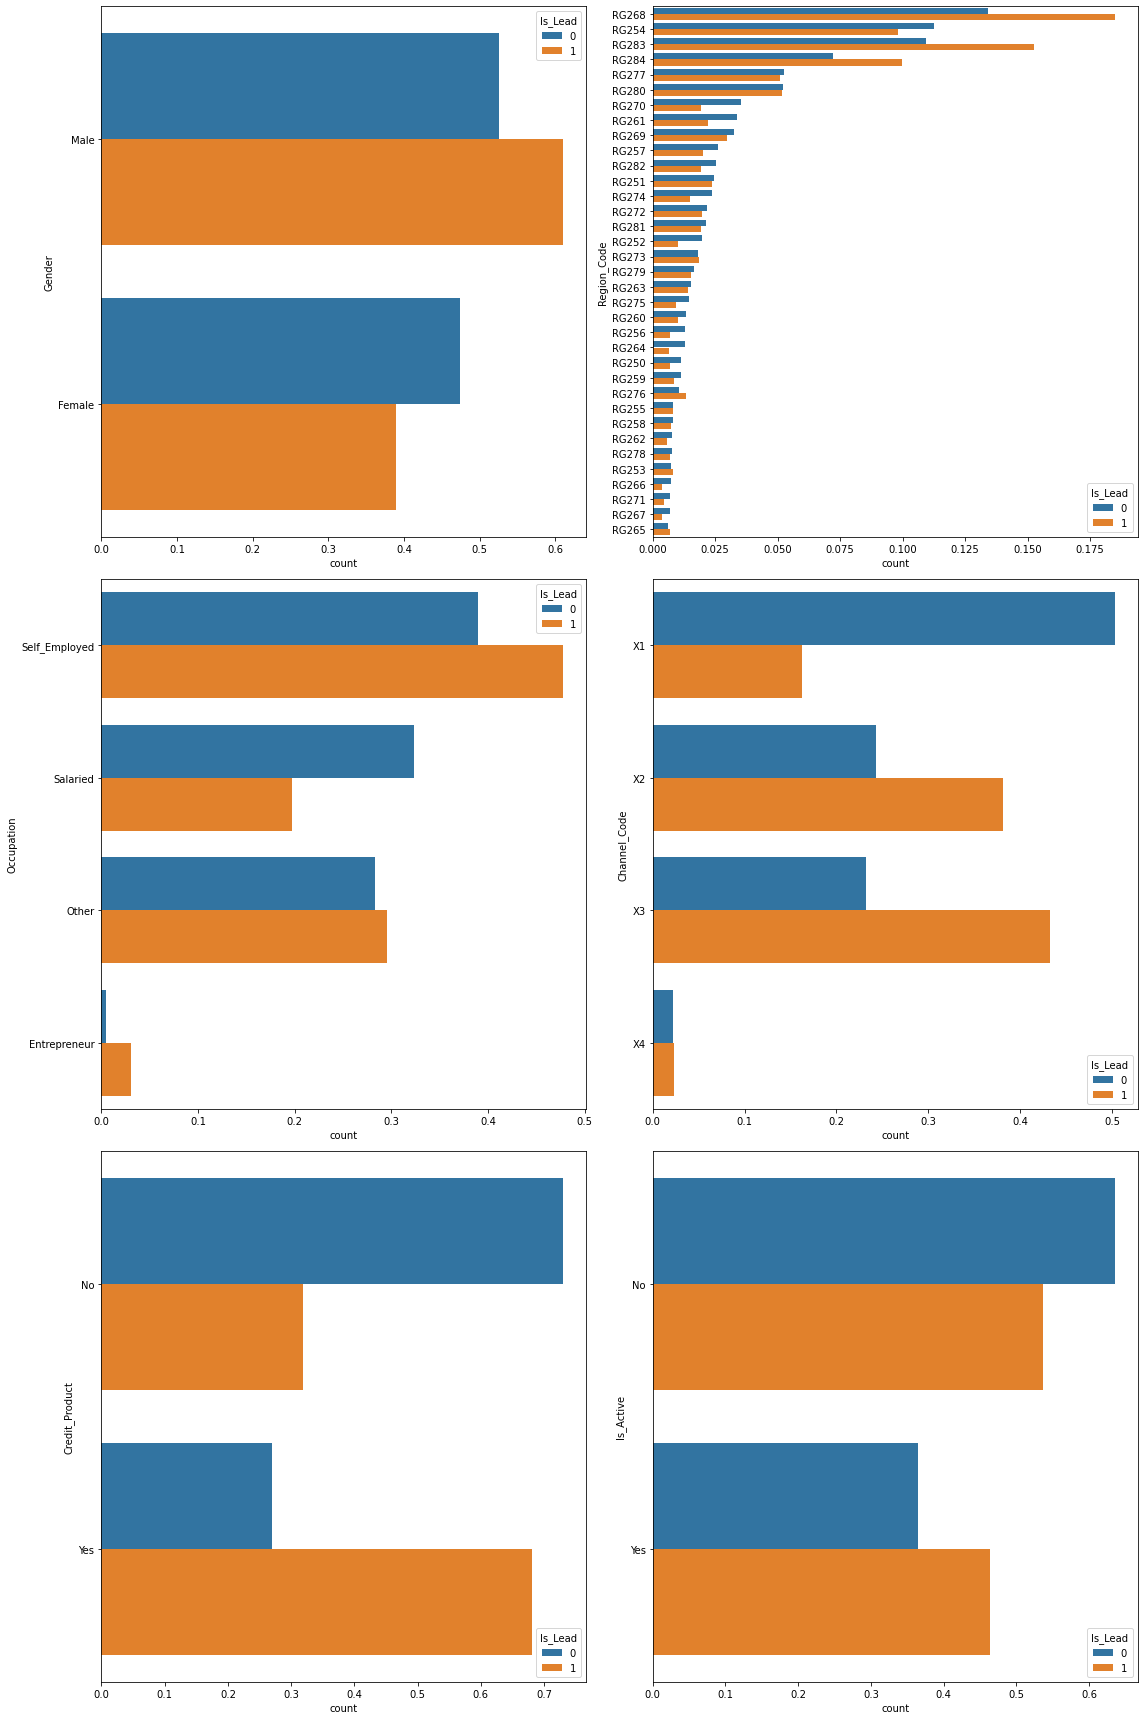

In [15]:
TARGET_COL = "Is_Lead"
fig, axes = plt.subplots(3, 2, figsize=(16, 24))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(train[cat_cols]):
    fltr = train[TARGET_COL] == 0
    vc_a = train[fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_b = train[~fltr][c].value_counts(normalize=True).reset_index().rename({'index' : c, c: 'count'}, axis=1)

    vc_a[TARGET_COL] = 0
    vc_b[TARGET_COL] = 1

    df = pd.concat([vc_a, vc_b]).reset_index(drop = True)

    _ = sns.barplot(y = c, x = 'count', data =df , hue=TARGET_COL, ax=axes[i])
    
_ = plt.tight_layout()

##### Here we are checking that among the missing value in  feature "Credit_Product" how many customers are present which are eligible to take credit card and how mnay of them are not eligible to take credit card

In [20]:
fill_train = train["Credit_Product"].fillna("NAN")

In [23]:
y = train["Is_Lead"]

In [24]:
NAN = y[fill_train=="NAN"].value_counts()

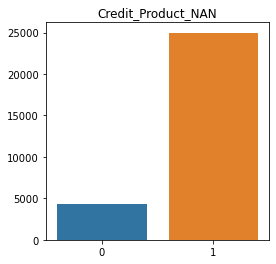

In [25]:
plt.figure(figsize=(4, 4))
plt.title("Credit_Product_NAN")
sns.barplot(NAN.index, NAN.values)
plt.show()

# Q: Are active customers more eligible to take credit card ?

<AxesSubplot:ylabel='Is_Active'>

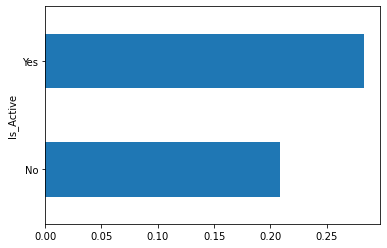

In [27]:
train.groupby("Is_Active")[TARGET_COL].mean().sort_values().plot(kind="barh")

## Ans: Our intution was right active cutomers are more eligible for the credit card.

# Q: Which group of people among the Occupation feature has more people who are eligible for the credit card ?

<AxesSubplot:ylabel='Occupation'>

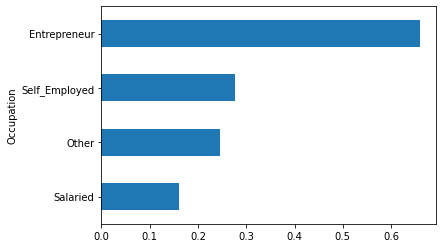

In [133]:
train.groupby("Occupation")[TARGET_COL].mean().sort_values().plot(kind="barh")

# Ans: Entrepreneur are most eligible for the credit cards.

# Q: Do people having any Credit_Product are more eligible for the credit card ?

<AxesSubplot:ylabel='Credit_Product'>

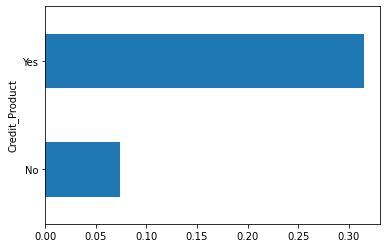

In [134]:
train.groupby("Credit_Product")[TARGET_COL].mean().sort_values().plot(kind="barh")

## Ans: Our intution was right people having any credit product are more eligible for the credit card

# Target Distribution

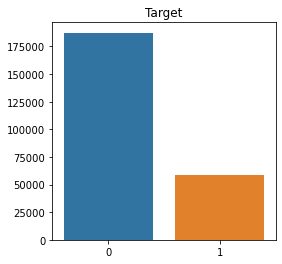

In [98]:
Target = y.value_counts()
plt.figure(figsize=(4, 4))
plt.title("Target")
sns.barplot(Target.index, Target.values)
plt.show()

In [107]:
Target[0]/(Target[0]+Target[1])*100

76.27917387323228

In [108]:
Target[1]/(Target[0]+Target[1])*100

23.720826126767726

# Numerical Columns Analysis

In [139]:
num_cols = train.select_dtypes("int64").columns

In [140]:
num_cols

Index(['Age', 'Vintage', 'Avg_Account_Balance', 'Is_Lead'], dtype='object')

In [138]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# Here we are checking the distribution of all the numerical variables in train as well as test data to find any outliers among them 

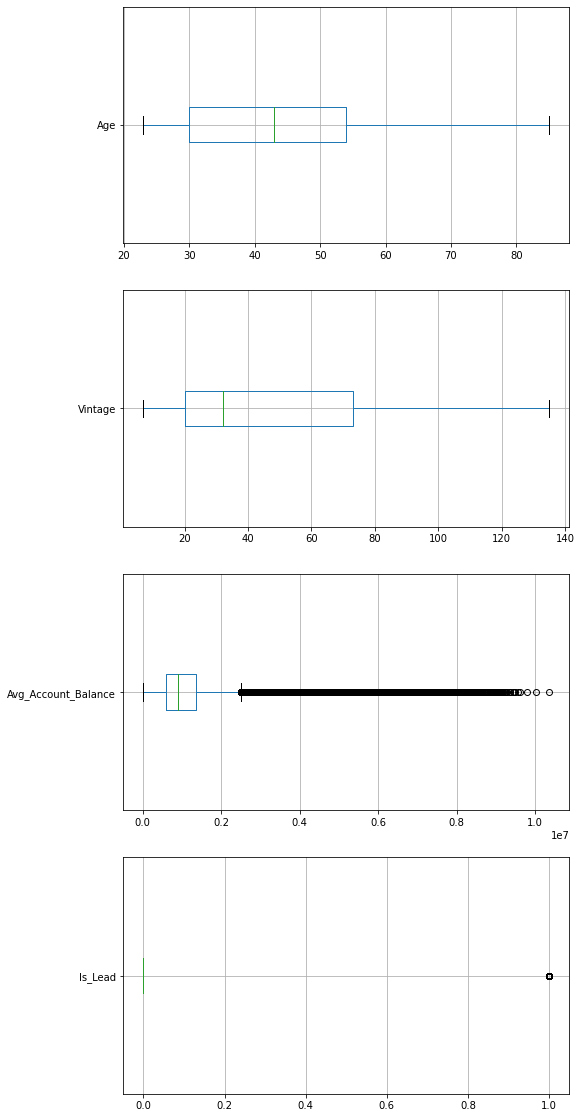

In [144]:
fig, axes = plt.subplots(4, 1, figsize=(8, 20))
for i,c in enumerate(num_cols):
    _ = train[[c]].boxplot(ax = axes[i],vert=False)

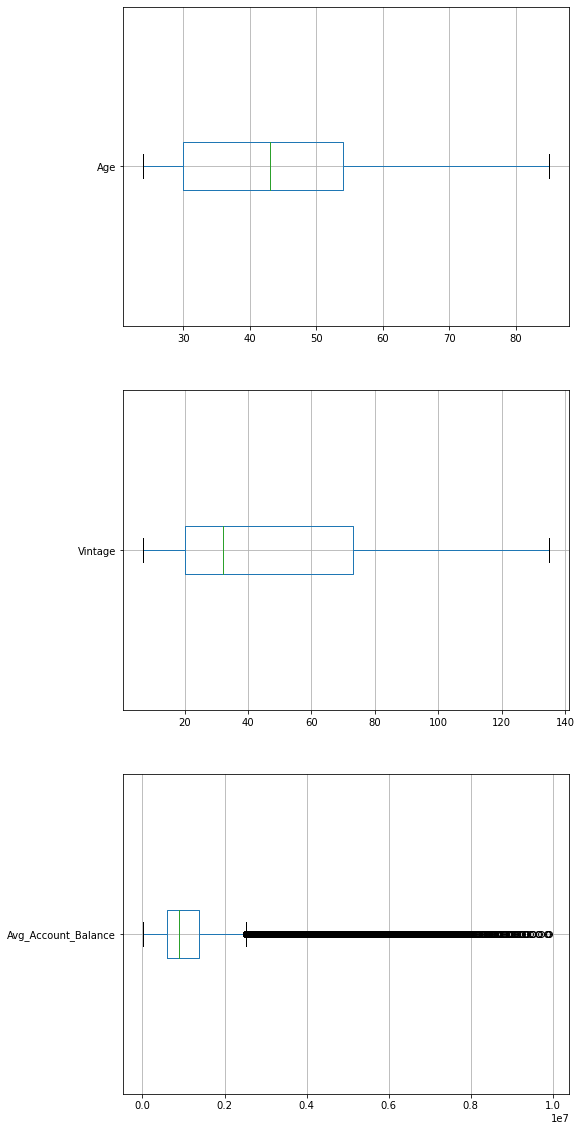

In [158]:
fig, axes = plt.subplots(3, 1, figsize=(8, 20))
for i,c in enumerate(num_cols[:-1]):
    _ = test[[c]].boxplot(ax = axes[i],vert=False)

## We find out that the distribution of both train & test data is similar so there are no outliers present in it

# Q: Do people with high Avg_Account_Balance have more chances of to be eligible for the credit card?

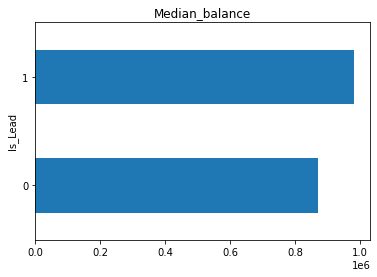

In [104]:
_ = train.groupby(TARGET_COL)['Avg_Account_Balance'].median().plot(kind = 'barh', title=f'Median_balance')

## Ans: Our hypothesis is right people having high Avg_Account_Balance have more chances to be eligible for the credit card

# Q: Do people who have been the customer of the banks for longer period of time are more eligible for the credit card?

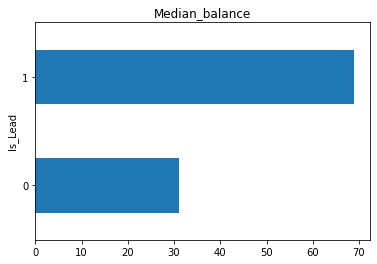

In [146]:
_ = train.groupby(TARGET_COL)['Vintage'].median().plot(kind = 'barh', title=f'Median_months')

## Ans: Our hypothesis was right people who have been the customer of the bank for the longer period of time are more eligible for the credit card

# Q: Do people above 50 years of age have more chances to be eligible for the credit card?

<AxesSubplot:title={'center':'Probability of subscribing to a term deposit'}, ylabel='is_old'>

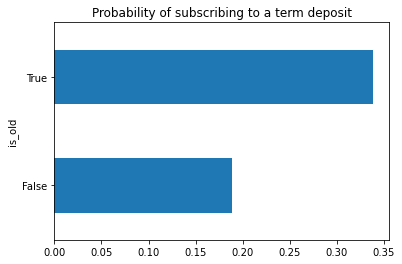

In [28]:
train["is_old"] = True
train.loc[train["Age"]<=50,"is_old"] = False
train.groupby("is_old")[TARGET_COL].mean().sort_values().plot(kind = 'barh', title='Probability of subscribing to a term deposit')

## Ans: Our hypothesis was right people above 50 years of age are more in number's to be eligible for the credit card

# Among all the numerical features pressent are there any features who have more correlation among them selfs

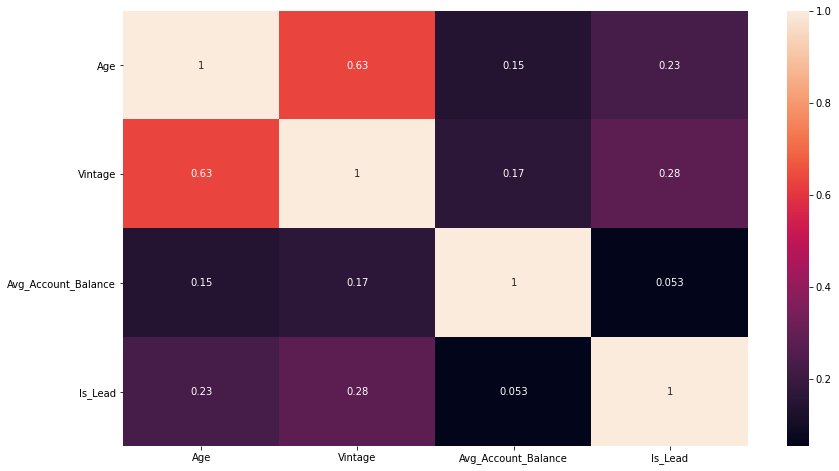

In [154]:
plt.figure(figsize=(14, 8))
_ = sns.heatmap(train[num_cols].corr(), annot=True)

### There is  no high correlation between the  numerical features given the highest correlation can be seen among the features age & vintage which is 0.63 which is not that big to drop one of the given feature

# NAN VAlues

#### This is the method i use in our final model by repalcing all the NAN values with a string NAN this indicate that it did not have idea of whether customer do have any Credit_Product or not so our binary categorical feature get converted to feature having 3 categorical values NAN,Yes & No 

####  I have also tried to replace the NAN values with the categories present in the feature already like Yes and NO but it did not give any boost to result

In [10]:
train["Credit_Product"].fillna("NAN",inplace=True)
test["Credit_Product"].fillna("NAN",inplace=True)

In [341]:
train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
245720,Male,51,RG284,Self_Employed,X3,109,NAN,1925586,No,0
245721,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,Female,28,RG273,Salaried,X1,31,No,407504,No,0


In [260]:
# train["is_old"] = 1
# train.loc[train["Age"]<=50,"is_old"] = 0

# test["is_old"] = 1
# test.loc[test["Age"]<=50,"is_old"] = 0

# CatBoost Encode

### Here i used inbuilt encoding of the Cat Boost model without using any outer embeddings in this particular model

In [13]:
Cat_train = train.copy()
Cat_test = test.copy()

In [63]:
y_Cat = Cat_train["Is_Lead"]
Cat_train.drop(columns="Is_Lead",inplace=True)

In [64]:
Cat_train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,Female,73,RG268,Other,X3,43,No,1045696,No
1,Female,30,RG277,Salaried,X1,32,No,581988,No
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes
3,Male,34,RG270,Salaried,X1,19,No,470454,No
4,Female,30,RG282,Salaried,X1,33,No,886787,No


In [65]:
from catboost import CatBoostClassifier

In [403]:
cat_f = CatBoostClassifier(depth=5,iterations=500)

In [404]:
cat_features_index = [0,2,3,4,6,8]

In [405]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,1,1045696,0,0
1,0,30,27,2,0,32,1,581988,0,0
2,0,56,18,3,2,26,1,1484315,1,0
3,1,34,20,2,0,19,1,470454,0,0
4,0,30,32,2,0,33,1,886787,0,0


In [406]:
cat_f.fit(Cat_train,y,cat_features=cat_features_index)

Learning rate set to 0.204033
0:	learn: 0.5509820	total: 245ms	remaining: 2m 2s
1:	learn: 0.4669602	total: 498ms	remaining: 2m 4s
2:	learn: 0.4182856	total: 670ms	remaining: 1m 51s
3:	learn: 0.3924268	total: 828ms	remaining: 1m 42s
4:	learn: 0.3773891	total: 1.02s	remaining: 1m 41s
5:	learn: 0.3679132	total: 1.18s	remaining: 1m 37s
6:	learn: 0.3612693	total: 1.36s	remaining: 1m 36s
7:	learn: 0.3570427	total: 1.54s	remaining: 1m 34s
8:	learn: 0.3541328	total: 1.71s	remaining: 1m 33s
9:	learn: 0.3523838	total: 1.9s	remaining: 1m 33s
10:	learn: 0.3511509	total: 2.07s	remaining: 1m 32s
11:	learn: 0.3502148	total: 2.3s	remaining: 1m 33s
12:	learn: 0.3493003	total: 2.52s	remaining: 1m 34s
13:	learn: 0.3489227	total: 2.74s	remaining: 1m 35s
14:	learn: 0.3483392	total: 3s	remaining: 1m 36s
15:	learn: 0.3478947	total: 3.24s	remaining: 1m 37s
16:	learn: 0.3471583	total: 3.47s	remaining: 1m 38s
17:	learn: 0.3468969	total: 3.65s	remaining: 1m 37s
18:	learn: 0.3467151	total: 3.81s	remaining: 1m 36s

158:	learn: 0.3409999	total: 32.5s	remaining: 1m 9s
159:	learn: 0.3409882	total: 32.7s	remaining: 1m 9s
160:	learn: 0.3409737	total: 33s	remaining: 1m 9s
161:	learn: 0.3409680	total: 33.2s	remaining: 1m 9s
162:	learn: 0.3409622	total: 33.4s	remaining: 1m 9s
163:	learn: 0.3409565	total: 33.7s	remaining: 1m 8s
164:	learn: 0.3409357	total: 33.9s	remaining: 1m 8s
165:	learn: 0.3409265	total: 34.1s	remaining: 1m 8s
166:	learn: 0.3409147	total: 34.3s	remaining: 1m 8s
167:	learn: 0.3408884	total: 34.6s	remaining: 1m 8s
168:	learn: 0.3408757	total: 34.7s	remaining: 1m 8s
169:	learn: 0.3408433	total: 35s	remaining: 1m 7s
170:	learn: 0.3408086	total: 35.3s	remaining: 1m 7s
171:	learn: 0.3407757	total: 35.5s	remaining: 1m 7s
172:	learn: 0.3407521	total: 35.7s	remaining: 1m 7s
173:	learn: 0.3407262	total: 36s	remaining: 1m 7s
174:	learn: 0.3407228	total: 36.2s	remaining: 1m 7s
175:	learn: 0.3407219	total: 36.4s	remaining: 1m 6s
176:	learn: 0.3406935	total: 36.6s	remaining: 1m 6s
177:	learn: 0.3406

317:	learn: 0.3385755	total: 1m 9s	remaining: 39.7s
318:	learn: 0.3385608	total: 1m 9s	remaining: 39.5s
319:	learn: 0.3385561	total: 1m 9s	remaining: 39.2s
320:	learn: 0.3385381	total: 1m 9s	remaining: 39s
321:	learn: 0.3385056	total: 1m 10s	remaining: 38.8s
322:	learn: 0.3384984	total: 1m 10s	remaining: 38.5s
323:	learn: 0.3384884	total: 1m 10s	remaining: 38.3s
324:	learn: 0.3384835	total: 1m 10s	remaining: 38s
325:	learn: 0.3384677	total: 1m 10s	remaining: 37.8s
326:	learn: 0.3384616	total: 1m 11s	remaining: 37.6s
327:	learn: 0.3384413	total: 1m 11s	remaining: 37.4s
328:	learn: 0.3384321	total: 1m 11s	remaining: 37.1s
329:	learn: 0.3384063	total: 1m 11s	remaining: 36.9s
330:	learn: 0.3383807	total: 1m 11s	remaining: 36.7s
331:	learn: 0.3383766	total: 1m 12s	remaining: 36.5s
332:	learn: 0.3383672	total: 1m 12s	remaining: 36.2s
333:	learn: 0.3383549	total: 1m 12s	remaining: 36s
334:	learn: 0.3383452	total: 1m 12s	remaining: 35.8s
335:	learn: 0.3383310	total: 1m 12s	remaining: 35.6s
336

474:	learn: 0.3368824	total: 1m 45s	remaining: 5.55s
475:	learn: 0.3368767	total: 1m 45s	remaining: 5.33s
476:	learn: 0.3368704	total: 1m 45s	remaining: 5.11s
477:	learn: 0.3368524	total: 1m 46s	remaining: 4.89s
478:	learn: 0.3368414	total: 1m 46s	remaining: 4.67s
479:	learn: 0.3368256	total: 1m 46s	remaining: 4.45s
480:	learn: 0.3368062	total: 1m 46s	remaining: 4.22s
481:	learn: 0.3368059	total: 1m 47s	remaining: 4s
482:	learn: 0.3368028	total: 1m 47s	remaining: 3.78s
483:	learn: 0.3367976	total: 1m 47s	remaining: 3.56s
484:	learn: 0.3367955	total: 1m 47s	remaining: 3.34s
485:	learn: 0.3367737	total: 1m 48s	remaining: 3.12s
486:	learn: 0.3367615	total: 1m 48s	remaining: 2.9s
487:	learn: 0.3367537	total: 1m 48s	remaining: 2.67s
488:	learn: 0.3367438	total: 1m 49s	remaining: 2.45s
489:	learn: 0.3367303	total: 1m 49s	remaining: 2.23s
490:	learn: 0.3367262	total: 1m 49s	remaining: 2.01s
491:	learn: 0.3367212	total: 1m 49s	remaining: 1.78s
492:	learn: 0.3367176	total: 1m 49s	remaining: 1.5

In [407]:
y_cat_f = cat_f.predict(Cat_train)

In [408]:
roc_auc_score(y_cat_f,y_Cat)

0.837961298202359

In [409]:
cat_f.score(Cat_train,y)

0.8629199308169702

In [396]:
un = cat_f.predict_proba(Cat_test)

In [397]:
un = pd.DataFrame(un,columns=["0","1"])

In [398]:
un = un["1"]

In [399]:
un = np.array(un).reshape(-1,1)

 # Here is the Graph of feature importance in Cat Boost Model

<AxesSubplot:>

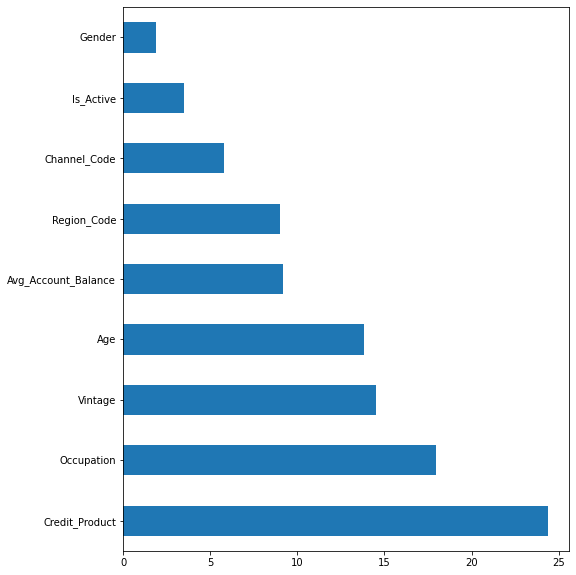

In [400]:
feat_imp = pd.Series(cat_f.feature_importances_, index=Cat_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [401]:
y_prediction = np.hstack([ID,un])

In [402]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Is_Lead"])
df.to_csv("cat_f.csv",index=False)

# One Hot

### I have tried the one hot embeding in it but it turns out that it did not work that well in and accuracy not improved so i drop the idea of using One Hot Encoding

In [304]:
# x_train = pd.get_dummies(train,drop_first=True)
# x_test = pd.get_dummies(test,drop_first=True)

# Label Encoding

### I used Label Encoding on the categorical features to convert them into numerical one so that model get trained

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
lb = LabelEncoder()

In [16]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [17]:
train["Gender"] = lb.fit_transform(train["Gender"])
test["Gender"] = lb.transform(test["Gender"])

train["Region_Code"] = lb.fit_transform(train["Region_Code"])
test["Region_Code"] = lb.transform(test["Region_Code"])

train["Occupation"] = lb.fit_transform(train["Occupation"])
test["Occupation"] = lb.transform(test["Occupation"])

train["Channel_Code"] = lb.fit_transform(train["Channel_Code"])
test["Channel_Code"] = lb.transform(test["Channel_Code"])

train["Credit_Product"] = lb.fit_transform(train["Credit_Product"])
test["Credit_Product"] = lb.transform(test["Credit_Product"])

train["Is_Active"] = lb.fit_transform(train["Is_Active"])
test["Is_Active"] = lb.transform(test["Is_Active"])


In [18]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,1,1045696,0,0
1,0,30,27,2,0,32,1,581988,0,0
2,0,56,18,3,2,26,1,1484315,1,0
3,1,34,20,2,0,19,1,470454,0,0
4,0,30,32,2,0,33,1,886787,0,0


In [311]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Gender               245725 non-null  int32
 1   Age                  245725 non-null  int64
 2   Region_Code          245725 non-null  int32
 3   Occupation           245725 non-null  int32
 4   Channel_Code         245725 non-null  int32
 5   Vintage              245725 non-null  int64
 6   Credit_Product       245725 non-null  int32
 7   Avg_Account_Balance  245725 non-null  int64
 8   Is_Active            245725 non-null  int32
 9   Is_Lead              245725 non-null  int64
dtypes: int32(6), int64(4)
memory usage: 13.1 MB


In [312]:
test.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,2,742366,0
1,1,43,18,1,1,49,0,925537,0
2,1,31,20,2,0,14,1,215949,0
3,1,29,22,1,0,33,1,868070,0
4,0,29,20,1,0,19,1,657087,0


# Normalisation

### I have used normalisation technique to bring the numerical features in thhe same range but it did not work that well and accuracy fell so i dropped the idea of using it in main model

In [313]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [81]:
scaler = StandardScaler()

In [106]:
# train["Age"] = scaler.fit_transform(np.array(train["Age"]).reshape(-1,1))
# test["Age"] = scaler.transform(np.array(test["Age"]).reshape(-1,1))

# train["Region_Code"] = scaler.fit_transform(np.array(train["Region_Code"]).reshape(-1,1))
# test["Region_Code"] = scaler.transform(np.array(test["Region_Code"]).reshape(-1,1))

# # train["Occupation"] = scaler.fit_transform(np.array(train["Occupation"]).reshape(-1,1))
# # test["Occupation"] = scaler.transform(np.array(test["Occupation"]).reshape(-1,1))

# train["Vintage"] = scaler.fit_transform(np.array(train["Vintage"]).reshape(-1,1))
# test["Vintage"] = scaler.transform(np.array(test["Vintage"]).reshape(-1,1))

# train["Avg_Account_Balance"] = scaler.fit_transform(np.array(train["Avg_Account_Balance"]).reshape(-1,1))
# test["Avg_Account_Balance"] = scaler.transform(np.array(test["Avg_Account_Balance"]).reshape(-1,1))

In [83]:
train.head()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,1.965365,-0.172389,1,2,-0.122373,0,-0.096968,0,0
1,0,-0.934429,0.655830,2,0,-0.462372,0,-0.640630,0,0
2,0,0.818935,-0.172389,3,2,-0.647825,0,0.417279,1,0
3,1,-0.664680,0.011660,2,0,-0.864188,0,-0.771395,0,0
4,0,-0.934429,1.115951,2,0,-0.431463,0,-0.283276,0,0


# Model Building

### Separating independent and dependent variables

In [21]:
y = train["Is_Lead"]
x = train.drop(columns = "Is_Lead")

In [22]:
# y = x_train["Is_Lead"]
# x = x_train.drop(columns = "Is_Lead")

In [105]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.metrics import roc_auc_score,make_scorer

scoring_function = make_scorer(roc_auc_score)

# 1) XGBoost

###### Function to check it's performance valdation set by using StratifiedKFold on folds =8

In [109]:
from xgboost import XGBClassifier

In [107]:
def xgb_model(x,y,x_test):
    
    
    params={'lambda': 1.417495651744778, 
        'alpha': 0.4281901245971981, 
        'colsample_bytree': 0.7, 
        'subsample': 0.8, 
        'learning_rate': 0.016,
        'max_depth': 5, 
        'random_state': 2020, 
        'min_child_weight': 30}
    
    err = [] 

    oofs = np.zeros(shape=(len(x)))
    preds = np.zeros(shape=(len(x_test)))

    Folds=8

    fold = StratifiedKFold(n_splits=Folds, shuffle=True, random_state=2020)
    i = 1

    for train_index, test_index in fold.split(x, y):
        x_train, x_val = x.iloc[train_index], x.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    
        m = XGBClassifier(n_estimators=500,**params)
    
        m.fit(x_train, y_train,eval_set=[(x_val, y_val)], early_stopping_rounds=30,verbose=False,eval_metric='auc')
    
        pred_y = m.predict_proba(x_val)[:,1]
        oofs[test_index] = pred_y
        print(i, " err_xgb: ", roc_auc_score(y_val,pred_y))
        err.append(roc_auc_score(y_val,pred_y))
        preds+= m.predict_proba(x_test)[:,1]
        i = i + 1
    preds=preds/Folds
    
    print(f"Average StratifiedKFold Score : {sum(err)/Folds} ")
    oof_score = roc_auc_score(y, oofs)
    print(f'\nOOF Auc is : {oof_score}')

In [28]:
params={'lambda': 1.417495651744778, 
        'alpha': 0.4281901245971981, 
        'colsample_bytree': 0.7, 
        'subsample': 0.8, 
        'learning_rate': 0.016,
        'max_depth': 5, 
        'random_state': 2020, 
        'min_child_weight': 30}

In [29]:
xgb = XGBClassifier(**params,n_estimators=500)

In [383]:
scores = cross_val_score(xgb, x, y, cv=5,scoring=scoring_function)

In [36]:
scores

array([0.75678648, 0.75481993, 0.75376082, 0.75477969, 0.75934765])

In [38]:
np.median(scores)

0.7548199313288703

In [30]:
xgb.fit(x,y)

XGBClassifier(alpha=0.4281901245971981, base_score=0.5, booster='gbtree',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', lambda=1.417495651744778,
              learning_rate=0.016, max_delta_step=0, max_depth=5,
              min_child_weight=30, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              random_state=2020, reg_alpha=0.428190112, reg_lambda=1.41749561,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [31]:
y_pred_xgb = xgb.predict(x)

In [32]:
roc_auc_score(y_pred_xgb,y)

0.8410492764049036

In [33]:
xgb.score(x,y)

0.8614263912910775

In [34]:
y_xgb = xgb.predict_proba(test)

In [35]:
y_xgb = pd.DataFrame(y_xgb,columns=["0","1"])

In [36]:
y_xgb = y_xgb["1"]

In [37]:
y_xgb = np.array(y_xgb).reshape(-1,1)

In [41]:
y_xgb_prob = xgb.predict_proba(test)

# Feature Importance graph for Xg Boost Model

<AxesSubplot:>

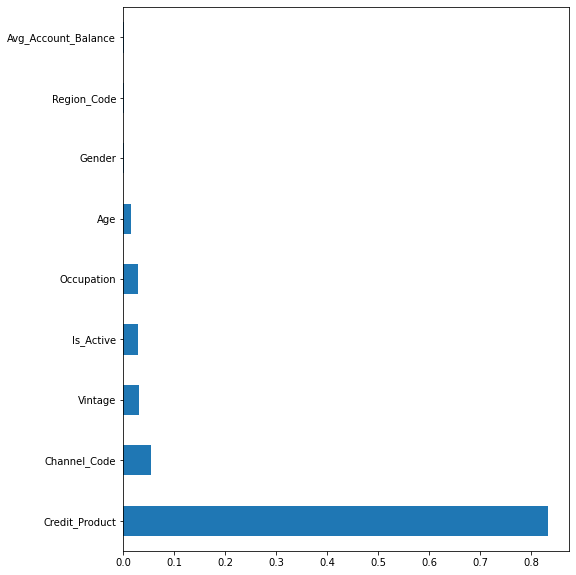

In [38]:
feat_imp = pd.Series(xgb.feature_importances_, index=x.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [39]:
y_prediction = np.hstack([ID,y_xgb])

In [40]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Is_Lead"])
df.to_csv("xgb.csv",index=False)

In [26]:
xgb_model(x,y,test)

1  err_xgb:  0.8739508964215424
2  err_xgb:  0.8740947565294277
3  err_xgb:  0.8725514580257228
4  err_xgb:  0.8725747019904637
5  err_xgb:  0.8763961111347378
6  err_xgb:  0.8743965523089383
7  err_xgb:  0.8735696867813534
8  err_xgb:  0.8736799831642776
Average StratifiedKFold Score : 0.873901768294558 

OOF Auc is : 0.8737974583304807


# 2) LGBM

In [43]:
from lightgbm import LGBMClassifier

###### Function to check it's performance valdation set by using StratifiedKFold on folds =8

In [108]:
def lgb_model(train,test,y):
    params={ 'max_depth': 8,'random_state': 24,"num_leaves":32,'lambda': 2.8849054495567423, 
        'alpha': 0.001054193185317787}
    
    err = []
    oofs = np.zeros(shape=len(train))
    preds = np.zeros(shape=len(test))
    
    Folds = 8
    
    fold = StratifiedKFold(n_splits=Folds,shuffle=True,random_state=42)
    
    i = 1
    
    for train_index,test_index in fold.split(train,y):
        x_train,x_val = train.iloc[train_index],train.iloc[test_index]
        y_train,y_val = y.iloc[train_index],y.iloc[test_index]
        
        m = LGBMClassifier(n_estimators=500,**params)
        
        m.fit(x_train,y_train,eval_set=[(x_val,y_val)], early_stopping_rounds=30,verbose=False,eval_metric='auc')
        
        pred_y = m.predict_proba(x_val)[:,-1]
        oofs[test_index] = pred_y
        
        print(i,"err_lgm:",roc_auc_score(y_val,pred_y))
        
        err.append(roc_auc_score(y_val,pred_y))
        preds+=m.predict_proba(test)[:,-1]
        i = i+1
        
    preds = preds/Folds
    
    print(f"Average StratifiedKFold Score : {sum(err)/Folds} ")
    oof_score = roc_auc_score(y, oofs)
    
    print(f'\nOOF Auc is : {oof_score}')

In [44]:
params={ 'max_depth': 8,'random_state': 24,"num_leaves":32,'lambda': 2.8849054495567423, 
        'alpha': 0.001054193185317787}

In [45]:
lgb = LGBMClassifier(n_estimators=500,**params)

#### Cross_val_score to check performance on validation set

In [352]:
scores = cross_val_score(lgb,x,y,cv=5,scoring=scoring_function)

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423


In [353]:
scores

array([0.75665793, 0.75418106, 0.75450216, 0.75540043, 0.75899608])

In [354]:
np.median(scores)

0.7554004333671379

In [46]:
lgb.fit(x,y)

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423


LGBMClassifier(alpha=0.001054193185317787, lambda=2.8849054495567423,
               max_depth=8, n_estimators=500, num_leaves=32, random_state=24)

In [47]:
y_pred_lgb = lgb.predict(x)

In [48]:
roc_auc_score(y_pred_lgb,y)

0.8474685027672391

In [49]:
lgb.score(x,y)

0.868474921151694

In [50]:
y_lgb_prob = lgb.predict_proba(test)

In [51]:
y_lgb = pd.DataFrame(y_lgb_prob,columns=["0","1"])

In [52]:
y_lgb = y_lgb["1"]

In [53]:
y_lgb

0         0.034086
1         0.879600
2         0.100723
3         0.020457
4         0.022428
            ...   
105307    0.990909
105308    0.580950
105309    0.069098
105310    0.220170
105311    0.059877
Name: 1, Length: 105312, dtype: float64

In [54]:
y_lgb = np.array(y_lgb).reshape(-1,1)

# Feature importance graph for LightGBM

<AxesSubplot:>

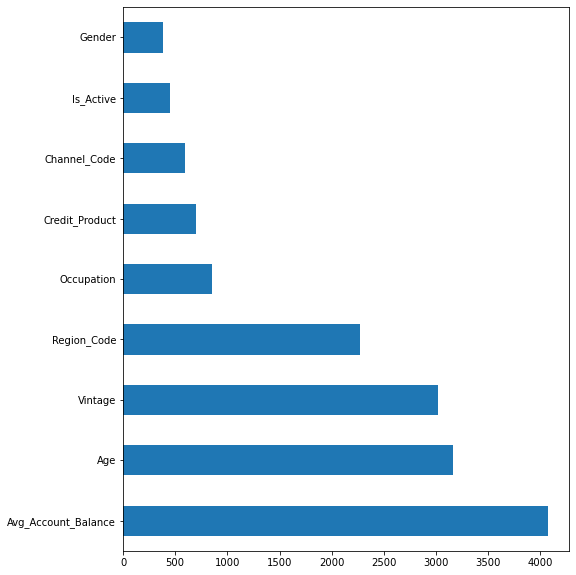

In [55]:
feat_imp = pd.Series(lgb.feature_importances_, index=x.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [56]:
y_prediction = np.hstack([ID,y_lgb])

In [57]:
y_prediction.shape

(105312, 2)

In [58]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Is_Lead"])
df.to_csv("lgb.csv",index=False)

In [379]:
lgb_model(x,test,y)

[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
1 err_lgm: 0.8746228508558734
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
2 err_lgm: 0.8763430301905595
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
3 err_lgm: 0.8711721179270366
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
4 err_lgm: 0.876072857176498
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.8849054495567423. Current value: lambda_l2=2.8849054495567423
5 err_lgm: 0.870734826195714
[LightGBM] [Warning] lambda_l2 is set with reg_lambda=0.0, will be overridden by lambda=2.88

# 3) CatBoost

In [59]:
from catboost import CatBoostClassifier

###### Function to check it's performance valdation set by using StratifiedKFold on folds =8

In [110]:
def cat_model(train,test,y):
#     params={ 'max_depth': 8,'random_state': 24,"num_leaves":32,'lambda': 2.8849054495567423, 
#         'alpha': 0.001054193185317787}
    
    err = []
    oofs = np.zeros(shape=len(train))
    preds = np.zeros(shape=len(test))
    
    Folds = 8
    cat_features_index = [0,2,3,4,6,8]
    fold = StratifiedKFold(n_splits=Folds,shuffle=True,random_state=42)
    
    i = 1
    
    for train_index,test_index in fold.split(train,y):
        x_train,x_val = train.iloc[train_index],train.iloc[test_index]
        y_train,y_val = y.iloc[train_index],y.iloc[test_index]
        
        m = CatBoostClassifier(n_estimators=600,depth=5,eval_metric='AUC')
#         ,cat_features=cat_features_index
        m.fit(x_train,y_train,eval_set=[(x_val,y_val)], early_stopping_rounds=30,verbose=None)
        
        pred_y = m.predict_proba(x_val)[:,-1]
        oofs[test_index] = pred_y
        
        print(i,"err_cat:",roc_auc_score(y_val,pred_y))
        
        err.append(roc_auc_score(y_val,pred_y))
        preds+=m.predict_proba(test)[:,-1]
        i = i+1
        
    preds = preds/Folds
    
    print(f"Average StratifiedKFold Score : {sum(err)/Folds} ")
    oof_score = roc_auc_score(y, oofs)
    
    print(f'\nOOF Auc is : {oof_score}')

In [60]:
cat = CatBoostClassifier(n_estimators=600,depth=5)

#### Cross_val_score on validation data

In [426]:
scores = cross_val_score(cat,x,y,cv=5,scoring=scoring_function)

Learning rate set to 0.227607
0:	learn: 0.5368404	total: 84.6ms	remaining: 33.7s
1:	learn: 0.4518303	total: 157ms	remaining: 31.2s
2:	learn: 0.4097980	total: 211ms	remaining: 28s
3:	learn: 0.3871895	total: 269ms	remaining: 26.6s
4:	learn: 0.3739946	total: 327ms	remaining: 25.8s
5:	learn: 0.3644936	total: 394ms	remaining: 25.9s
6:	learn: 0.3600300	total: 439ms	remaining: 24.7s
7:	learn: 0.3537316	total: 509ms	remaining: 25s
8:	learn: 0.3521211	total: 560ms	remaining: 24.3s
9:	learn: 0.3511229	total: 616ms	remaining: 24s
10:	learn: 0.3503112	total: 677ms	remaining: 23.9s
11:	learn: 0.3495318	total: 740ms	remaining: 23.9s
12:	learn: 0.3489698	total: 822ms	remaining: 24.5s
13:	learn: 0.3473037	total: 904ms	remaining: 24.9s
14:	learn: 0.3469133	total: 966ms	remaining: 24.8s
15:	learn: 0.3456159	total: 1.04s	remaining: 24.9s
16:	learn: 0.3453233	total: 1.09s	remaining: 24.6s
17:	learn: 0.3450723	total: 1.16s	remaining: 24.7s
18:	learn: 0.3449286	total: 1.22s	remaining: 24.6s
19:	learn: 0.344

161:	learn: 0.3354555	total: 10.3s	remaining: 15.1s
162:	learn: 0.3353996	total: 10.3s	remaining: 15s
163:	learn: 0.3353291	total: 10.4s	remaining: 14.9s
164:	learn: 0.3352800	total: 10.4s	remaining: 14.9s
165:	learn: 0.3352321	total: 10.5s	remaining: 14.8s
166:	learn: 0.3351949	total: 10.6s	remaining: 14.7s
167:	learn: 0.3351529	total: 10.6s	remaining: 14.7s
168:	learn: 0.3351012	total: 10.7s	remaining: 14.6s
169:	learn: 0.3350486	total: 10.7s	remaining: 14.5s
170:	learn: 0.3349756	total: 10.8s	remaining: 14.4s
171:	learn: 0.3349263	total: 10.8s	remaining: 14.4s
172:	learn: 0.3348767	total: 10.9s	remaining: 14.3s
173:	learn: 0.3348477	total: 11s	remaining: 14.2s
174:	learn: 0.3347966	total: 11s	remaining: 14.2s
175:	learn: 0.3347575	total: 11.1s	remaining: 14.1s
176:	learn: 0.3347055	total: 11.1s	remaining: 14s
177:	learn: 0.3346626	total: 11.2s	remaining: 14s
178:	learn: 0.3346259	total: 11.3s	remaining: 13.9s
179:	learn: 0.3345910	total: 11.3s	remaining: 13.8s
180:	learn: 0.3345634	

321:	learn: 0.3286027	total: 19.3s	remaining: 4.67s
322:	learn: 0.3285601	total: 19.3s	remaining: 4.6s
323:	learn: 0.3285312	total: 19.4s	remaining: 4.54s
324:	learn: 0.3284817	total: 19.4s	remaining: 4.48s
325:	learn: 0.3284481	total: 19.5s	remaining: 4.42s
326:	learn: 0.3284141	total: 19.5s	remaining: 4.36s
327:	learn: 0.3283768	total: 19.6s	remaining: 4.29s
328:	learn: 0.3283290	total: 19.6s	remaining: 4.23s
329:	learn: 0.3282891	total: 19.7s	remaining: 4.17s
330:	learn: 0.3282538	total: 19.7s	remaining: 4.11s
331:	learn: 0.3282266	total: 19.8s	remaining: 4.04s
332:	learn: 0.3281767	total: 19.8s	remaining: 3.98s
333:	learn: 0.3281535	total: 19.8s	remaining: 3.92s
334:	learn: 0.3281297	total: 19.9s	remaining: 3.86s
335:	learn: 0.3281038	total: 19.9s	remaining: 3.8s
336:	learn: 0.3280754	total: 20s	remaining: 3.73s
337:	learn: 0.3280394	total: 20s	remaining: 3.67s
338:	learn: 0.3280096	total: 20.1s	remaining: 3.61s
339:	learn: 0.3279588	total: 20.1s	remaining: 3.55s
340:	learn: 0.3279

82:	learn: 0.3400289	total: 4.15s	remaining: 15.8s
83:	learn: 0.3399943	total: 4.19s	remaining: 15.8s
84:	learn: 0.3399454	total: 4.25s	remaining: 15.7s
85:	learn: 0.3398664	total: 4.29s	remaining: 15.7s
86:	learn: 0.3398276	total: 4.33s	remaining: 15.6s
87:	learn: 0.3397573	total: 4.39s	remaining: 15.6s
88:	learn: 0.3396984	total: 4.44s	remaining: 15.5s
89:	learn: 0.3396629	total: 4.48s	remaining: 15.4s
90:	learn: 0.3395845	total: 4.53s	remaining: 15.4s
91:	learn: 0.3395234	total: 4.58s	remaining: 15.3s
92:	learn: 0.3394533	total: 4.62s	remaining: 15.3s
93:	learn: 0.3394062	total: 4.67s	remaining: 15.2s
94:	learn: 0.3393629	total: 4.71s	remaining: 15.1s
95:	learn: 0.3393079	total: 4.77s	remaining: 15.1s
96:	learn: 0.3392383	total: 4.82s	remaining: 15.1s
97:	learn: 0.3391578	total: 4.86s	remaining: 15s
98:	learn: 0.3391054	total: 4.91s	remaining: 14.9s
99:	learn: 0.3390381	total: 4.96s	remaining: 14.9s
100:	learn: 0.3389743	total: 5s	remaining: 14.8s
101:	learn: 0.3389201	total: 5.04s	

244:	learn: 0.3321928	total: 12.1s	remaining: 7.64s
245:	learn: 0.3321540	total: 12.1s	remaining: 7.6s
246:	learn: 0.3321055	total: 12.2s	remaining: 7.54s
247:	learn: 0.3320706	total: 12.2s	remaining: 7.49s
248:	learn: 0.3320258	total: 12.3s	remaining: 7.45s
249:	learn: 0.3319715	total: 12.3s	remaining: 7.4s
250:	learn: 0.3319207	total: 12.4s	remaining: 7.35s
251:	learn: 0.3318701	total: 12.4s	remaining: 7.29s
252:	learn: 0.3318362	total: 12.5s	remaining: 7.25s
253:	learn: 0.3317945	total: 12.5s	remaining: 7.21s
254:	learn: 0.3317690	total: 12.6s	remaining: 7.16s
255:	learn: 0.3317308	total: 12.6s	remaining: 7.11s
256:	learn: 0.3316819	total: 12.7s	remaining: 7.07s
257:	learn: 0.3316510	total: 12.7s	remaining: 7.01s
258:	learn: 0.3315963	total: 12.8s	remaining: 6.96s
259:	learn: 0.3315522	total: 12.8s	remaining: 6.91s
260:	learn: 0.3315193	total: 12.9s	remaining: 6.86s
261:	learn: 0.3314836	total: 12.9s	remaining: 6.81s
262:	learn: 0.3314551	total: 13s	remaining: 6.76s
263:	learn: 0.33

3:	learn: 0.3864980	total: 187ms	remaining: 18.5s
4:	learn: 0.3740069	total: 229ms	remaining: 18.1s
5:	learn: 0.3662426	total: 277ms	remaining: 18.2s
6:	learn: 0.3598394	total: 322ms	remaining: 18.1s
7:	learn: 0.3566030	total: 372ms	remaining: 18.2s
8:	learn: 0.3544905	total: 413ms	remaining: 17.9s
9:	learn: 0.3531611	total: 456ms	remaining: 17.8s
10:	learn: 0.3523119	total: 491ms	remaining: 17.4s
11:	learn: 0.3489239	total: 535ms	remaining: 17.3s
12:	learn: 0.3485474	total: 588ms	remaining: 17.5s
13:	learn: 0.3482227	total: 630ms	remaining: 17.4s
14:	learn: 0.3480114	total: 682ms	remaining: 17.5s
15:	learn: 0.3476392	total: 729ms	remaining: 17.5s
16:	learn: 0.3474430	total: 783ms	remaining: 17.6s
17:	learn: 0.3472206	total: 819ms	remaining: 17.4s
18:	learn: 0.3470491	total: 853ms	remaining: 17.1s
19:	learn: 0.3455939	total: 898ms	remaining: 17.1s
20:	learn: 0.3454602	total: 939ms	remaining: 16.9s
21:	learn: 0.3453092	total: 996ms	remaining: 17.1s
22:	learn: 0.3444726	total: 1.07s	rema

168:	learn: 0.3351840	total: 8.15s	remaining: 11.1s
169:	learn: 0.3351107	total: 8.21s	remaining: 11.1s
170:	learn: 0.3350651	total: 8.26s	remaining: 11.1s
171:	learn: 0.3350274	total: 8.3s	remaining: 11s
172:	learn: 0.3349665	total: 8.35s	remaining: 11s
173:	learn: 0.3349233	total: 8.4s	remaining: 10.9s
174:	learn: 0.3348650	total: 8.44s	remaining: 10.9s
175:	learn: 0.3348114	total: 8.48s	remaining: 10.8s
176:	learn: 0.3347622	total: 8.53s	remaining: 10.7s
177:	learn: 0.3347115	total: 8.57s	remaining: 10.7s
178:	learn: 0.3346545	total: 8.62s	remaining: 10.6s
179:	learn: 0.3346130	total: 8.67s	remaining: 10.6s
180:	learn: 0.3345429	total: 8.72s	remaining: 10.5s
181:	learn: 0.3344931	total: 8.77s	remaining: 10.5s
182:	learn: 0.3344646	total: 8.82s	remaining: 10.5s
183:	learn: 0.3344111	total: 8.87s	remaining: 10.4s
184:	learn: 0.3343694	total: 8.92s	remaining: 10.4s
185:	learn: 0.3343402	total: 8.98s	remaining: 10.3s
186:	learn: 0.3343068	total: 9.02s	remaining: 10.3s
187:	learn: 0.3342

328:	learn: 0.3284928	total: 15.5s	remaining: 3.35s
329:	learn: 0.3284605	total: 15.6s	remaining: 3.3s
330:	learn: 0.3284129	total: 15.6s	remaining: 3.25s
331:	learn: 0.3283699	total: 15.6s	remaining: 3.2s
332:	learn: 0.3283408	total: 15.7s	remaining: 3.15s
333:	learn: 0.3282820	total: 15.7s	remaining: 3.11s
334:	learn: 0.3282519	total: 15.8s	remaining: 3.06s
335:	learn: 0.3282255	total: 15.8s	remaining: 3.01s
336:	learn: 0.3281898	total: 15.9s	remaining: 2.96s
337:	learn: 0.3281597	total: 15.9s	remaining: 2.92s
338:	learn: 0.3281222	total: 16s	remaining: 2.87s
339:	learn: 0.3280652	total: 16s	remaining: 2.82s
340:	learn: 0.3280359	total: 16s	remaining: 2.77s
341:	learn: 0.3279895	total: 16.1s	remaining: 2.73s
342:	learn: 0.3279384	total: 16.1s	remaining: 2.68s
343:	learn: 0.3279040	total: 16.2s	remaining: 2.63s
344:	learn: 0.3278634	total: 16.2s	remaining: 2.58s
345:	learn: 0.3278242	total: 16.3s	remaining: 2.54s
346:	learn: 0.3277994	total: 16.3s	remaining: 2.49s
347:	learn: 0.327754

92:	learn: 0.3389764	total: 4.65s	remaining: 15.3s
93:	learn: 0.3389448	total: 4.71s	remaining: 15.3s
94:	learn: 0.3388922	total: 4.76s	remaining: 15.3s
95:	learn: 0.3388442	total: 4.82s	remaining: 15.3s
96:	learn: 0.3388103	total: 4.87s	remaining: 15.2s
97:	learn: 0.3387674	total: 4.92s	remaining: 15.2s
98:	learn: 0.3387131	total: 4.97s	remaining: 15.1s
99:	learn: 0.3386583	total: 5.02s	remaining: 15.1s
100:	learn: 0.3385886	total: 5.08s	remaining: 15s
101:	learn: 0.3385340	total: 5.13s	remaining: 15s
102:	learn: 0.3384890	total: 5.17s	remaining: 14.9s
103:	learn: 0.3384493	total: 5.21s	remaining: 14.8s
104:	learn: 0.3384083	total: 5.27s	remaining: 14.8s
105:	learn: 0.3383489	total: 5.32s	remaining: 14.8s
106:	learn: 0.3382956	total: 5.38s	remaining: 14.7s
107:	learn: 0.3382566	total: 5.43s	remaining: 14.7s
108:	learn: 0.3382116	total: 5.48s	remaining: 14.6s
109:	learn: 0.3381646	total: 5.53s	remaining: 14.6s
110:	learn: 0.3381077	total: 5.59s	remaining: 14.6s
111:	learn: 0.3380615	to

254:	learn: 0.3315620	total: 12.4s	remaining: 7.06s
255:	learn: 0.3315220	total: 12.5s	remaining: 7.01s
256:	learn: 0.3314856	total: 12.5s	remaining: 6.96s
257:	learn: 0.3313545	total: 12.5s	remaining: 6.91s
258:	learn: 0.3313181	total: 12.6s	remaining: 6.86s
259:	learn: 0.3312820	total: 12.6s	remaining: 6.81s
260:	learn: 0.3312571	total: 12.7s	remaining: 6.76s
261:	learn: 0.3312095	total: 12.7s	remaining: 6.71s
262:	learn: 0.3311789	total: 12.8s	remaining: 6.65s
263:	learn: 0.3311391	total: 12.8s	remaining: 6.61s
264:	learn: 0.3310987	total: 12.9s	remaining: 6.55s
265:	learn: 0.3310569	total: 12.9s	remaining: 6.5s
266:	learn: 0.3310193	total: 12.9s	remaining: 6.45s
267:	learn: 0.3309908	total: 13s	remaining: 6.4s
268:	learn: 0.3309439	total: 13s	remaining: 6.35s
269:	learn: 0.3308934	total: 13.1s	remaining: 6.3s
270:	learn: 0.3308494	total: 13.1s	remaining: 6.25s
271:	learn: 0.3308083	total: 13.2s	remaining: 6.2s
272:	learn: 0.3307547	total: 13.2s	remaining: 6.15s
273:	learn: 0.330710

13:	learn: 0.3470540	total: 624ms	remaining: 17.2s
14:	learn: 0.3467624	total: 673ms	remaining: 17.3s
15:	learn: 0.3465752	total: 716ms	remaining: 17.2s
16:	learn: 0.3461572	total: 774ms	remaining: 17.4s
17:	learn: 0.3458802	total: 828ms	remaining: 17.6s
18:	learn: 0.3456636	total: 884ms	remaining: 17.7s
19:	learn: 0.3455332	total: 934ms	remaining: 17.8s
20:	learn: 0.3454162	total: 988ms	remaining: 17.8s
21:	learn: 0.3453214	total: 1.04s	remaining: 17.8s
22:	learn: 0.3451823	total: 1.08s	remaining: 17.8s
23:	learn: 0.3451086	total: 1.12s	remaining: 17.6s
24:	learn: 0.3450182	total: 1.16s	remaining: 17.4s
25:	learn: 0.3449053	total: 1.21s	remaining: 17.5s
26:	learn: 0.3445168	total: 1.27s	remaining: 17.6s
27:	learn: 0.3444479	total: 1.32s	remaining: 17.5s
28:	learn: 0.3443697	total: 1.35s	remaining: 17.3s
29:	learn: 0.3442263	total: 1.41s	remaining: 17.3s
30:	learn: 0.3441261	total: 1.46s	remaining: 17.4s
31:	learn: 0.3440436	total: 1.5s	remaining: 17.2s
32:	learn: 0.3439673	total: 1.54

178:	learn: 0.3356165	total: 8.29s	remaining: 10.2s
179:	learn: 0.3355738	total: 8.34s	remaining: 10.2s
180:	learn: 0.3355373	total: 8.38s	remaining: 10.1s
181:	learn: 0.3354874	total: 8.42s	remaining: 10.1s
182:	learn: 0.3354447	total: 8.46s	remaining: 10s
183:	learn: 0.3353916	total: 8.51s	remaining: 9.99s
184:	learn: 0.3353405	total: 8.57s	remaining: 9.96s
185:	learn: 0.3352972	total: 8.61s	remaining: 9.9s
186:	learn: 0.3352569	total: 8.65s	remaining: 9.85s
187:	learn: 0.3352205	total: 8.69s	remaining: 9.79s
188:	learn: 0.3351770	total: 8.74s	remaining: 9.76s
189:	learn: 0.3351293	total: 8.78s	remaining: 9.71s
190:	learn: 0.3351023	total: 8.82s	remaining: 9.65s
191:	learn: 0.3350604	total: 8.86s	remaining: 9.6s
192:	learn: 0.3350485	total: 8.9s	remaining: 9.55s
193:	learn: 0.3350159	total: 8.94s	remaining: 9.49s
194:	learn: 0.3349908	total: 8.99s	remaining: 9.45s
195:	learn: 0.3349536	total: 9.04s	remaining: 9.4s
196:	learn: 0.3349206	total: 9.08s	remaining: 9.35s
197:	learn: 0.3348

339:	learn: 0.3289622	total: 15.9s	remaining: 2.8s
340:	learn: 0.3289237	total: 15.9s	remaining: 2.76s
341:	learn: 0.3288952	total: 16s	remaining: 2.71s
342:	learn: 0.3288529	total: 16s	remaining: 2.66s
343:	learn: 0.3288278	total: 16.1s	remaining: 2.62s
344:	learn: 0.3287880	total: 16.1s	remaining: 2.57s
345:	learn: 0.3287534	total: 16.2s	remaining: 2.52s
346:	learn: 0.3287239	total: 16.2s	remaining: 2.48s
347:	learn: 0.3286693	total: 16.3s	remaining: 2.43s
348:	learn: 0.3286398	total: 16.3s	remaining: 2.39s
349:	learn: 0.3286013	total: 16.4s	remaining: 2.34s
350:	learn: 0.3285503	total: 16.4s	remaining: 2.29s
351:	learn: 0.3285112	total: 16.5s	remaining: 2.25s
352:	learn: 0.3284843	total: 16.5s	remaining: 2.2s
353:	learn: 0.3284451	total: 16.6s	remaining: 2.15s
354:	learn: 0.3284244	total: 16.6s	remaining: 2.11s
355:	learn: 0.3283919	total: 16.7s	remaining: 2.06s
356:	learn: 0.3283556	total: 16.7s	remaining: 2.01s
357:	learn: 0.3283077	total: 16.8s	remaining: 1.97s
358:	learn: 0.3282

In [427]:
scores

array([0.75744834, 0.75324061, 0.75527752, 0.7565804 , 0.75883603])

In [428]:
np.median(scores)

0.756580399807657

In [61]:
cat.fit(x,y)

Learning rate set to 0.17262
0:	learn: 0.5708204	total: 182ms	remaining: 1m 49s
1:	learn: 0.4937245	total: 246ms	remaining: 1m 13s
2:	learn: 0.4455771	total: 294ms	remaining: 58.5s
3:	learn: 0.4166595	total: 340ms	remaining: 50.6s
4:	learn: 0.3977035	total: 384ms	remaining: 45.7s
5:	learn: 0.3853614	total: 433ms	remaining: 42.8s
6:	learn: 0.3718287	total: 480ms	remaining: 40.7s
7:	learn: 0.3663372	total: 526ms	remaining: 38.9s
8:	learn: 0.3631465	total: 563ms	remaining: 37s
9:	learn: 0.3602179	total: 614ms	remaining: 36.2s
10:	learn: 0.3587413	total: 656ms	remaining: 35.1s
11:	learn: 0.3572640	total: 695ms	remaining: 34.1s
12:	learn: 0.3534708	total: 739ms	remaining: 33.4s
13:	learn: 0.3526341	total: 797ms	remaining: 33.4s
14:	learn: 0.3519013	total: 842ms	remaining: 32.8s
15:	learn: 0.3508903	total: 890ms	remaining: 32.5s
16:	learn: 0.3502865	total: 924ms	remaining: 31.7s
17:	learn: 0.3498320	total: 965ms	remaining: 31.2s
18:	learn: 0.3490896	total: 1.01s	remaining: 30.8s
19:	learn: 0

160:	learn: 0.3406817	total: 7.62s	remaining: 20.8s
161:	learn: 0.3406578	total: 7.66s	remaining: 20.7s
162:	learn: 0.3406415	total: 7.72s	remaining: 20.7s
163:	learn: 0.3406173	total: 7.77s	remaining: 20.7s
164:	learn: 0.3405982	total: 7.83s	remaining: 20.6s
165:	learn: 0.3405764	total: 7.88s	remaining: 20.6s
166:	learn: 0.3405587	total: 7.94s	remaining: 20.6s
167:	learn: 0.3405273	total: 8s	remaining: 20.6s
168:	learn: 0.3405082	total: 8.06s	remaining: 20.5s
169:	learn: 0.3404894	total: 8.1s	remaining: 20.5s
170:	learn: 0.3404646	total: 8.16s	remaining: 20.5s
171:	learn: 0.3404468	total: 8.22s	remaining: 20.4s
172:	learn: 0.3404104	total: 8.26s	remaining: 20.4s
173:	learn: 0.3403896	total: 8.3s	remaining: 20.3s
174:	learn: 0.3403728	total: 8.35s	remaining: 20.3s
175:	learn: 0.3403513	total: 8.39s	remaining: 20.2s
176:	learn: 0.3403328	total: 8.43s	remaining: 20.1s
177:	learn: 0.3403174	total: 8.47s	remaining: 20.1s
178:	learn: 0.3402874	total: 8.51s	remaining: 20s
179:	learn: 0.34025

319:	learn: 0.3375342	total: 14.8s	remaining: 13s
320:	learn: 0.3375184	total: 14.9s	remaining: 12.9s
321:	learn: 0.3374986	total: 14.9s	remaining: 12.9s
322:	learn: 0.3374819	total: 15s	remaining: 12.8s
323:	learn: 0.3374664	total: 15s	remaining: 12.8s
324:	learn: 0.3374538	total: 15.1s	remaining: 12.8s
325:	learn: 0.3374374	total: 15.1s	remaining: 12.7s
326:	learn: 0.3374148	total: 15.2s	remaining: 12.7s
327:	learn: 0.3373955	total: 15.2s	remaining: 12.6s
328:	learn: 0.3373839	total: 15.3s	remaining: 12.6s
329:	learn: 0.3373664	total: 15.3s	remaining: 12.5s
330:	learn: 0.3373490	total: 15.4s	remaining: 12.5s
331:	learn: 0.3373285	total: 15.4s	remaining: 12.4s
332:	learn: 0.3373203	total: 15.5s	remaining: 12.4s
333:	learn: 0.3373008	total: 15.5s	remaining: 12.3s
334:	learn: 0.3372835	total: 15.5s	remaining: 12.3s
335:	learn: 0.3372659	total: 15.6s	remaining: 12.3s
336:	learn: 0.3372479	total: 15.6s	remaining: 12.2s
337:	learn: 0.3372353	total: 15.7s	remaining: 12.2s
338:	learn: 0.3372

482:	learn: 0.3350111	total: 22.5s	remaining: 5.44s
483:	learn: 0.3350001	total: 22.5s	remaining: 5.39s
484:	learn: 0.3349863	total: 22.5s	remaining: 5.35s
485:	learn: 0.3349762	total: 22.6s	remaining: 5.3s
486:	learn: 0.3349638	total: 22.6s	remaining: 5.25s
487:	learn: 0.3349462	total: 22.7s	remaining: 5.21s
488:	learn: 0.3349297	total: 22.7s	remaining: 5.16s
489:	learn: 0.3349158	total: 22.8s	remaining: 5.11s
490:	learn: 0.3349003	total: 22.8s	remaining: 5.07s
491:	learn: 0.3348821	total: 22.9s	remaining: 5.02s
492:	learn: 0.3348642	total: 22.9s	remaining: 4.97s
493:	learn: 0.3348511	total: 23s	remaining: 4.93s
494:	learn: 0.3348391	total: 23s	remaining: 4.88s
495:	learn: 0.3348193	total: 23.1s	remaining: 4.84s
496:	learn: 0.3348035	total: 23.1s	remaining: 4.79s
497:	learn: 0.3347875	total: 23.2s	remaining: 4.74s
498:	learn: 0.3347712	total: 23.2s	remaining: 4.7s
499:	learn: 0.3347576	total: 23.3s	remaining: 4.65s
500:	learn: 0.3347358	total: 23.3s	remaining: 4.61s
501:	learn: 0.3347

In [62]:
y_pred_cat = cat.predict(x)

In [63]:
roc_auc_score(y_pred_cat,y)

0.8416442264074614

In [64]:
cat.score(x,y)

0.8656994607793265

In [65]:
y_cat_prob = cat.predict_proba(test)

In [66]:
y_cat = pd.DataFrame(y_cat_prob,columns=["0","1"])

In [67]:
y_cat = y_cat["1"]

In [68]:
y_cat

0         0.048243
1         0.883171
2         0.082828
3         0.024266
4         0.022361
            ...   
105307    0.989455
105308    0.614028
105309    0.098966
105310    0.202441
105311    0.046060
Name: 1, Length: 105312, dtype: float64

In [69]:
y_cat = np.array(y_cat).reshape(-1,1)

# Feature importance graph on cat boost

<AxesSubplot:>

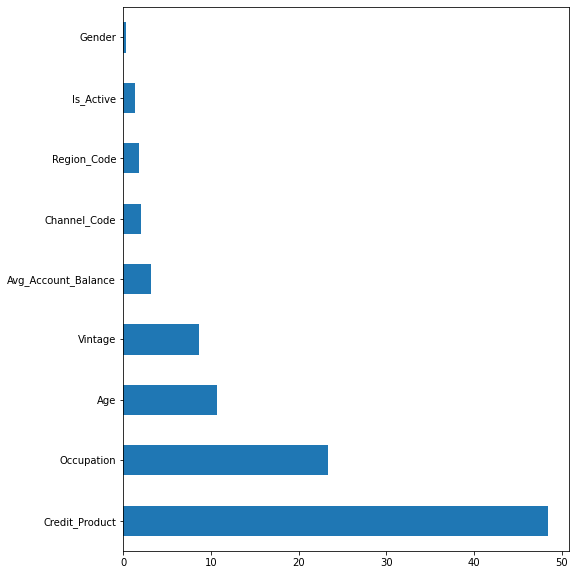

In [70]:
feat_imp = pd.Series(cat.feature_importances_, index=x.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [71]:
y_prediction = np.hstack([ID,y_cat])

In [72]:
y_prediction.shape

(105312, 2)

In [73]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Is_Lead"])
df.to_csv("cat.csv",index=False)

In [459]:
cat_model(x,test,y)

Learning rate set to 0.149118
0:	test: 0.8574483	best: 0.8574483 (0)	total: 35.9ms	remaining: 21.5s
1:	test: 0.8588523	best: 0.8588523 (1)	total: 67.7ms	remaining: 20.2s
2:	test: 0.8611588	best: 0.8611588 (2)	total: 106ms	remaining: 21.1s
3:	test: 0.8620054	best: 0.8620054 (3)	total: 141ms	remaining: 21s
4:	test: 0.8623924	best: 0.8623924 (4)	total: 178ms	remaining: 21.2s
5:	test: 0.8624856	best: 0.8624856 (5)	total: 212ms	remaining: 21s
6:	test: 0.8643921	best: 0.8643921 (6)	total: 252ms	remaining: 21.3s
7:	test: 0.8651280	best: 0.8651280 (7)	total: 287ms	remaining: 21.3s
8:	test: 0.8656938	best: 0.8656938 (8)	total: 324ms	remaining: 21.3s
9:	test: 0.8660201	best: 0.8660201 (9)	total: 360ms	remaining: 21.2s
10:	test: 0.8659353	best: 0.8660201 (9)	total: 394ms	remaining: 21.1s
11:	test: 0.8661469	best: 0.8661469 (11)	total: 435ms	remaining: 21.3s
12:	test: 0.8697498	best: 0.8697498 (12)	total: 478ms	remaining: 21.6s
13:	test: 0.8697227	best: 0.8697498 (12)	total: 513ms	remaining: 21.5s

117:	test: 0.8743002	best: 0.8743283 (97)	total: 4.72s	remaining: 19.3s
118:	test: 0.8743428	best: 0.8743428 (118)	total: 4.76s	remaining: 19.2s
119:	test: 0.8743323	best: 0.8743428 (118)	total: 4.8s	remaining: 19.2s
120:	test: 0.8743215	best: 0.8743428 (118)	total: 4.83s	remaining: 19.1s
121:	test: 0.8743109	best: 0.8743428 (118)	total: 4.87s	remaining: 19.1s
122:	test: 0.8743295	best: 0.8743428 (118)	total: 4.92s	remaining: 19.1s
123:	test: 0.8743235	best: 0.8743428 (118)	total: 4.96s	remaining: 19s
124:	test: 0.8742954	best: 0.8743428 (118)	total: 4.99s	remaining: 19s
125:	test: 0.8742825	best: 0.8743428 (118)	total: 5.03s	remaining: 18.9s
126:	test: 0.8742446	best: 0.8743428 (118)	total: 5.07s	remaining: 18.9s
127:	test: 0.8742412	best: 0.8743428 (118)	total: 5.11s	remaining: 18.8s
128:	test: 0.8742605	best: 0.8743428 (118)	total: 5.14s	remaining: 18.8s
129:	test: 0.8742326	best: 0.8743428 (118)	total: 5.18s	remaining: 18.7s
130:	test: 0.8742517	best: 0.8743428 (118)	total: 5.21s	r

81:	test: 0.8751633	best: 0.8751633 (81)	total: 4.18s	remaining: 26.4s
82:	test: 0.8752047	best: 0.8752047 (82)	total: 4.22s	remaining: 26.3s
83:	test: 0.8752349	best: 0.8752349 (83)	total: 4.28s	remaining: 26.3s
84:	test: 0.8752454	best: 0.8752454 (84)	total: 4.31s	remaining: 26.1s
85:	test: 0.8752268	best: 0.8752454 (84)	total: 4.37s	remaining: 26.1s
86:	test: 0.8752332	best: 0.8752454 (84)	total: 4.42s	remaining: 26.1s
87:	test: 0.8752196	best: 0.8752454 (84)	total: 4.47s	remaining: 26s
88:	test: 0.8752216	best: 0.8752454 (84)	total: 4.52s	remaining: 26s
89:	test: 0.8752390	best: 0.8752454 (84)	total: 4.57s	remaining: 25.9s
90:	test: 0.8752454	best: 0.8752454 (90)	total: 4.63s	remaining: 25.9s
91:	test: 0.8752606	best: 0.8752606 (91)	total: 4.67s	remaining: 25.8s
92:	test: 0.8752987	best: 0.8752987 (92)	total: 4.72s	remaining: 25.7s
93:	test: 0.8752597	best: 0.8752987 (92)	total: 4.78s	remaining: 25.7s
94:	test: 0.8752687	best: 0.8752987 (92)	total: 4.83s	remaining: 25.7s
95:	test: 

22:	test: 0.8677064	best: 0.8677064 (22)	total: 1.03s	remaining: 25.7s
23:	test: 0.8679145	best: 0.8679145 (23)	total: 1.09s	remaining: 26.2s
24:	test: 0.8680937	best: 0.8680937 (24)	total: 1.15s	remaining: 26.6s
25:	test: 0.8682110	best: 0.8682110 (25)	total: 1.21s	remaining: 26.7s
26:	test: 0.8683096	best: 0.8683096 (26)	total: 1.27s	remaining: 26.9s
27:	test: 0.8684148	best: 0.8684148 (27)	total: 1.32s	remaining: 27s
28:	test: 0.8684719	best: 0.8684719 (28)	total: 1.39s	remaining: 27.4s
29:	test: 0.8684880	best: 0.8684880 (29)	total: 1.45s	remaining: 27.6s
30:	test: 0.8685987	best: 0.8685987 (30)	total: 1.5s	remaining: 27.6s
31:	test: 0.8687367	best: 0.8687367 (31)	total: 1.56s	remaining: 27.6s
32:	test: 0.8692001	best: 0.8692001 (32)	total: 1.62s	remaining: 27.8s
33:	test: 0.8691250	best: 0.8692001 (32)	total: 1.68s	remaining: 27.9s
34:	test: 0.8691788	best: 0.8692001 (32)	total: 1.73s	remaining: 27.9s
35:	test: 0.8692210	best: 0.8692210 (35)	total: 1.77s	remaining: 27.8s
36:	test:

138:	test: 0.8708147	best: 0.8709149 (126)	total: 6.9s	remaining: 22.9s
139:	test: 0.8708045	best: 0.8709149 (126)	total: 6.95s	remaining: 22.8s
140:	test: 0.8708138	best: 0.8709149 (126)	total: 7s	remaining: 22.8s
141:	test: 0.8708085	best: 0.8709149 (126)	total: 7.06s	remaining: 22.8s
142:	test: 0.8708456	best: 0.8709149 (126)	total: 7.11s	remaining: 22.7s
143:	test: 0.8708525	best: 0.8709149 (126)	total: 7.17s	remaining: 22.7s
144:	test: 0.8708574	best: 0.8709149 (126)	total: 7.23s	remaining: 22.7s
145:	test: 0.8708124	best: 0.8709149 (126)	total: 7.28s	remaining: 22.6s
146:	test: 0.8708173	best: 0.8709149 (126)	total: 7.34s	remaining: 22.6s
147:	test: 0.8708073	best: 0.8709149 (126)	total: 7.39s	remaining: 22.6s
148:	test: 0.8708257	best: 0.8709149 (126)	total: 7.44s	remaining: 22.5s
149:	test: 0.8708221	best: 0.8709149 (126)	total: 7.49s	remaining: 22.5s
150:	test: 0.8708109	best: 0.8709149 (126)	total: 7.55s	remaining: 22.4s
151:	test: 0.8708202	best: 0.8709149 (126)	total: 7.59s

96:	test: 0.8758377	best: 0.8758377 (96)	total: 5.36s	remaining: 27.8s
97:	test: 0.8758749	best: 0.8758749 (97)	total: 5.42s	remaining: 27.7s
98:	test: 0.8758901	best: 0.8758901 (98)	total: 5.46s	remaining: 27.6s
99:	test: 0.8759235	best: 0.8759235 (99)	total: 5.52s	remaining: 27.6s
100:	test: 0.8759490	best: 0.8759490 (100)	total: 5.58s	remaining: 27.6s
101:	test: 0.8759439	best: 0.8759490 (100)	total: 5.65s	remaining: 27.6s
102:	test: 0.8759358	best: 0.8759490 (100)	total: 5.7s	remaining: 27.5s
103:	test: 0.8759579	best: 0.8759579 (103)	total: 5.76s	remaining: 27.5s
104:	test: 0.8759672	best: 0.8759672 (104)	total: 5.82s	remaining: 27.4s
105:	test: 0.8759736	best: 0.8759736 (105)	total: 5.87s	remaining: 27.4s
106:	test: 0.8760381	best: 0.8760381 (106)	total: 5.92s	remaining: 27.3s
107:	test: 0.8760835	best: 0.8760835 (107)	total: 5.98s	remaining: 27.2s
108:	test: 0.8760976	best: 0.8760976 (108)	total: 6.04s	remaining: 27.2s
109:	test: 0.8760902	best: 0.8760976 (108)	total: 6.09s	rema

66:	test: 0.8703489	best: 0.8703551 (59)	total: 3.56s	remaining: 28.3s
67:	test: 0.8703638	best: 0.8703638 (67)	total: 3.61s	remaining: 28.3s
68:	test: 0.8703588	best: 0.8703638 (67)	total: 3.64s	remaining: 28s
69:	test: 0.8702907	best: 0.8703638 (67)	total: 3.69s	remaining: 27.9s
70:	test: 0.8703202	best: 0.8703638 (67)	total: 3.74s	remaining: 27.8s
71:	test: 0.8703130	best: 0.8703638 (67)	total: 3.78s	remaining: 27.7s
72:	test: 0.8703211	best: 0.8703638 (67)	total: 3.83s	remaining: 27.6s
73:	test: 0.8703164	best: 0.8703638 (67)	total: 3.88s	remaining: 27.6s
74:	test: 0.8703478	best: 0.8703638 (67)	total: 3.93s	remaining: 27.5s
75:	test: 0.8703499	best: 0.8703638 (67)	total: 3.98s	remaining: 27.5s
76:	test: 0.8703402	best: 0.8703638 (67)	total: 4.03s	remaining: 27.3s
77:	test: 0.8703391	best: 0.8703638 (67)	total: 4.07s	remaining: 27.2s
78:	test: 0.8703400	best: 0.8703638 (67)	total: 4.12s	remaining: 27.1s
79:	test: 0.8703372	best: 0.8703638 (67)	total: 4.18s	remaining: 27.2s
80:	test

37:	test: 0.8725204	best: 0.8725204 (37)	total: 2.17s	remaining: 32.1s
38:	test: 0.8725744	best: 0.8725744 (38)	total: 2.23s	remaining: 32.1s
39:	test: 0.8725866	best: 0.8725866 (39)	total: 2.29s	remaining: 32.1s
40:	test: 0.8725775	best: 0.8725866 (39)	total: 2.37s	remaining: 32.3s
41:	test: 0.8725883	best: 0.8725883 (41)	total: 2.42s	remaining: 32.1s
42:	test: 0.8725888	best: 0.8725888 (42)	total: 2.47s	remaining: 32s
43:	test: 0.8726007	best: 0.8726007 (43)	total: 2.54s	remaining: 32.1s
44:	test: 0.8726267	best: 0.8726267 (44)	total: 2.58s	remaining: 31.9s
45:	test: 0.8726836	best: 0.8726836 (45)	total: 2.63s	remaining: 31.7s
46:	test: 0.8727895	best: 0.8727895 (46)	total: 2.69s	remaining: 31.6s
47:	test: 0.8728484	best: 0.8728484 (47)	total: 2.73s	remaining: 31.5s
48:	test: 0.8728535	best: 0.8728535 (48)	total: 2.79s	remaining: 31.4s
49:	test: 0.8729743	best: 0.8729743 (49)	total: 2.86s	remaining: 31.5s
50:	test: 0.8729885	best: 0.8729885 (50)	total: 2.91s	remaining: 31.4s
51:	test

154:	test: 0.8736442	best: 0.8736442 (154)	total: 8.12s	remaining: 23.3s
155:	test: 0.8736157	best: 0.8736442 (154)	total: 8.16s	remaining: 23.2s
156:	test: 0.8736205	best: 0.8736442 (154)	total: 8.2s	remaining: 23.1s
157:	test: 0.8736160	best: 0.8736442 (154)	total: 8.24s	remaining: 23.1s
158:	test: 0.8736278	best: 0.8736442 (154)	total: 8.28s	remaining: 23s
159:	test: 0.8736311	best: 0.8736442 (154)	total: 8.33s	remaining: 22.9s
160:	test: 0.8737114	best: 0.8737114 (160)	total: 8.39s	remaining: 22.9s
161:	test: 0.8737204	best: 0.8737204 (161)	total: 8.44s	remaining: 22.8s
162:	test: 0.8737062	best: 0.8737204 (161)	total: 8.48s	remaining: 22.7s
163:	test: 0.8736943	best: 0.8737204 (161)	total: 8.53s	remaining: 22.7s
164:	test: 0.8737050	best: 0.8737204 (161)	total: 8.6s	remaining: 22.7s
165:	test: 0.8736695	best: 0.8737204 (161)	total: 8.64s	remaining: 22.6s
166:	test: 0.8736644	best: 0.8737204 (161)	total: 8.68s	remaining: 22.5s
167:	test: 0.8736710	best: 0.8737204 (161)	total: 8.72s

75:	test: 0.8750926	best: 0.8750926 (75)	total: 3.91s	remaining: 27s
76:	test: 0.8750958	best: 0.8750958 (76)	total: 3.96s	remaining: 26.9s
77:	test: 0.8750997	best: 0.8750997 (77)	total: 4.01s	remaining: 26.9s
78:	test: 0.8751339	best: 0.8751339 (78)	total: 4.07s	remaining: 26.9s
79:	test: 0.8751668	best: 0.8751668 (79)	total: 4.13s	remaining: 26.8s
80:	test: 0.8751875	best: 0.8751875 (80)	total: 4.18s	remaining: 26.8s
81:	test: 0.8751992	best: 0.8751992 (81)	total: 4.23s	remaining: 26.7s
82:	test: 0.8752086	best: 0.8752086 (82)	total: 4.28s	remaining: 26.7s
83:	test: 0.8752480	best: 0.8752480 (83)	total: 4.33s	remaining: 26.6s
84:	test: 0.8752388	best: 0.8752480 (83)	total: 4.39s	remaining: 26.6s
85:	test: 0.8752675	best: 0.8752675 (85)	total: 4.45s	remaining: 26.6s
86:	test: 0.8752970	best: 0.8752970 (86)	total: 4.5s	remaining: 26.5s
87:	test: 0.8754053	best: 0.8754053 (87)	total: 4.56s	remaining: 26.5s
88:	test: 0.8754181	best: 0.8754181 (88)	total: 4.62s	remaining: 26.5s
89:	test:

9:	test: 0.8652403	best: 0.8652403 (9)	total: 397ms	remaining: 23.4s
10:	test: 0.8687005	best: 0.8687005 (10)	total: 444ms	remaining: 23.8s
11:	test: 0.8691232	best: 0.8691232 (11)	total: 485ms	remaining: 23.8s
12:	test: 0.8691462	best: 0.8691462 (12)	total: 528ms	remaining: 23.9s
13:	test: 0.8693627	best: 0.8693627 (13)	total: 579ms	remaining: 24.2s
14:	test: 0.8693880	best: 0.8693880 (14)	total: 644ms	remaining: 25.1s
15:	test: 0.8694711	best: 0.8694711 (15)	total: 696ms	remaining: 25.4s
16:	test: 0.8695398	best: 0.8695398 (16)	total: 750ms	remaining: 25.7s
17:	test: 0.8698594	best: 0.8698594 (17)	total: 810ms	remaining: 26.2s
18:	test: 0.8708409	best: 0.8708409 (18)	total: 892ms	remaining: 27.3s
19:	test: 0.8709635	best: 0.8709635 (19)	total: 962ms	remaining: 27.9s
20:	test: 0.8714636	best: 0.8714636 (20)	total: 1.04s	remaining: 28.7s
21:	test: 0.8713490	best: 0.8714636 (20)	total: 1.11s	remaining: 29.1s
22:	test: 0.8713255	best: 0.8714636 (20)	total: 1.16s	remaining: 29.2s
23:	test

126:	test: 0.8752024	best: 0.8752126 (122)	total: 6.71s	remaining: 25s
127:	test: 0.8752182	best: 0.8752182 (127)	total: 6.77s	remaining: 25s
128:	test: 0.8752139	best: 0.8752182 (127)	total: 6.82s	remaining: 24.9s
129:	test: 0.8752260	best: 0.8752260 (129)	total: 6.85s	remaining: 24.8s
130:	test: 0.8752048	best: 0.8752260 (129)	total: 6.9s	remaining: 24.7s
131:	test: 0.8752135	best: 0.8752260 (129)	total: 6.96s	remaining: 24.7s
132:	test: 0.8752402	best: 0.8752402 (132)	total: 7s	remaining: 24.6s
133:	test: 0.8752430	best: 0.8752430 (133)	total: 7.05s	remaining: 24.5s
134:	test: 0.8752631	best: 0.8752631 (134)	total: 7.1s	remaining: 24.5s
135:	test: 0.8752747	best: 0.8752747 (135)	total: 7.14s	remaining: 24.4s
136:	test: 0.8753011	best: 0.8753011 (136)	total: 7.19s	remaining: 24.3s
137:	test: 0.8753069	best: 0.8753069 (137)	total: 7.23s	remaining: 24.2s
138:	test: 0.8753191	best: 0.8753191 (138)	total: 7.3s	remaining: 24.2s
139:	test: 0.8753205	best: 0.8753205 (139)	total: 7.35s	remai

# 4) Random Forrest

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rf = RandomForestClassifier(n_estimators=400,max_depth=10)

## Cross_val_score for validation data checking

In [46]:
scores = cross_val_score(rf,x,y,cv=5,scoring=scoring_function)

In [48]:
scores

array([0.73535509, 0.73477369, 0.73649799, 0.73751031, 0.73870889])

In [ ]:
rf.fit(x,y)

In [ ]:
y_pred_rf = rf.predict(x)

In [ ]:
y_rf = pd.DataFrame(y_rf,columns=["0","1"])

In [ ]:
y_rf = y_rf["1"]

In [ ]:
y_rf = np.array(y_rf).reshape(-1,1)

In [ ]:
feat_imp = pd.Series(rf.feature_importances_, index=x.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,10))

In [ ]:
y_prediction = np.hstack([ID,y_rf])

In [ ]:
y_prediction.shape

In [ ]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Is_Lead"])
df.to_csv("rf.csv",index=False)

# Ensemble

# It is the weighted ensemble of LighGbm , XgBoost & CatBoost with weightage of LighGbm=0.5,XgBoost=0.3,CatBoost=0.2

In [95]:
y_ensemble = []
lgb_boost = 0.5
cat_boost = 0.2
xgb_boost = 0.3
# lgbm = 0.
for i,j,k in zip(y_lgb_prob,y_cat_prob,y_xgb_prob):
    xx = [(lgb_boost*i[0])+(cat_boost*j[0])+(xgb_boost*k[0]),
         (lgb_boost*i[1])+(cat_boost*j[1])+(xgb_boost*k[1])]
    y_ensemble.append(xx)

In [96]:
y_ensemble = pd.DataFrame(y_ensemble,columns=["0","1"])

In [97]:
y_ensemble = y_ensemble["1"]

In [98]:
y_ensemble = np.array(y_ensemble).reshape(-1,1)

In [99]:
y_prediction = np.hstack([ID,y_ensemble])

In [100]:
y_prediction.shape

(105312, 2)

In [101]:
df = pd.DataFrame(y_prediction ,columns = ["ID","Is_Lead"])
df.to_csv("ensemble2.csv",index=False)

# Dusre Ka MAL

### Jaise yha age aya tho sabse pehle sari unique ages nikalo fir dekho ki wo values age me kha kha pe hai train me fir unse depeendent variables ko nikalo jo us particular age se connected hai aur fir unka mean nikal do 

In [1]:
def converter(column=str):
    return {i:train.loc[train[column]==i,"Is_Lead"].sum()/train.loc[train[column]==i,"Is_Lead"].count() for i in train[column].unique()}
def conv_relative(col):    
    return (train.loc[(train['Is_Lead']==1),col].value_counts() / len(train.loc[(train['Is_Lead']==1),col])).to_dict()

In [ ]:
train['LeadConvRate_by_Age']=train['Age'].map(converter('Age'))
test['LeadConvRate_by_Age']=test['Age'].map(converter('Age'))
train['LeadConvRate_by_Vintage']=train['Vintage_log'].map(converter('Vintage_log'))
test['LeadConvRate_by_Vintage']=test['Vintage_log'].map(converter('Vintage_log'))

# Aggregate ka kamal

In [ ]:
train['Avg_Acc_bal_by_region_code']=train.groupby(['Region_Code'])['Avg_Account_Balance_log'].transform('mean')
test['Avg_Acc_bal_by_region_code']=test.groupby(['Region_Code'])['Avg_Account_Balance_log'].transform('mean')
train['Avg_Acc_bal_by_region_code_min']=train.groupby(['Region_Code'])['Avg_Account_Balance_log'].transform('min')
test['Avg_Acc_bal_by_region_code_min']=test.groupby(['Region_Code'])['Avg_Account_Balance_log'].transform('min')
train['Avg_Acc_bal_by_region_code_max']=train.groupby(['Region_Code'])['Avg_Account_Balance_log'].transform('max')